In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.feature_selection import SelectKBest, chi2, RFE
import numpy as np

In [2]:
data=pd.read_csv('../Datasets/heart.csv')

In [3]:
data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
X_data=data.drop(['target'], axis=1)
y_data=data['target']

In [5]:
scaler=StandardScaler()
X_data=pd.DataFrame(scaler.fit_transform(X_data), columns=X_data.columns)


In [15]:
from sklearn.decomposition import PCA, FastICA

pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_data)
print("📊 PCA Extracted Features (first 5 rows):")
print(pd.DataFrame(X_pca).head())


📊 PCA Extracted Features (first 5 rows):
          0         1         2         3         4
0 -0.522556 -1.112803  0.956816  1.149198  0.559252
1  2.590381 -0.533162  1.467315 -1.536614 -1.345335
2  3.042352 -1.327521 -0.424765 -1.567204 -0.283814
3 -0.492522 -0.276720  0.801442  0.984277  0.487587
4  2.187464  1.951477 -0.385539 -0.295793  2.386144


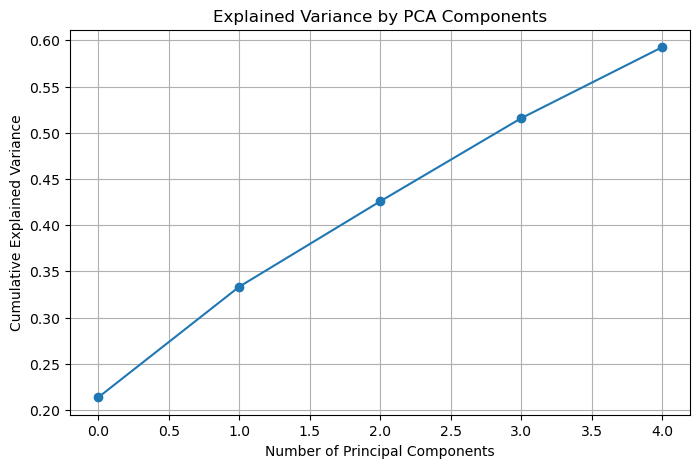

In [11]:
import matplotlib.pyplot as plt
import numpy as np

explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(8,5))
plt.plot(np.cumsum(explained_variance), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.show()


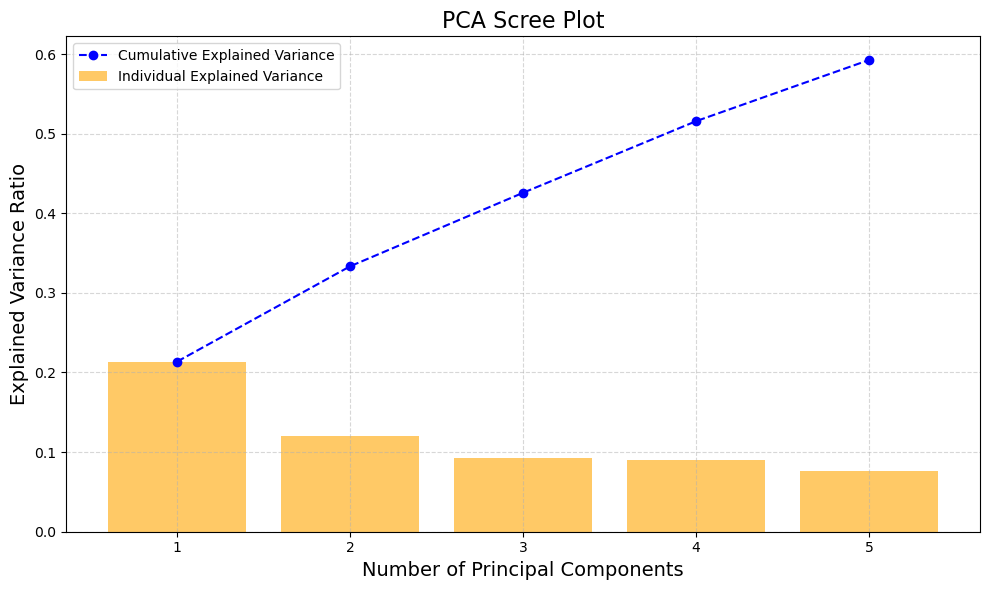

In [12]:

explained_variance = pca.explained_variance_ratio_

cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(10,6))
plt.plot(range(1, len(explained_variance)+1), cumulative_variance, marker='o', linestyle='--', color='blue', label='Cumulative Explained Variance')
plt.bar(range(1, len(explained_variance)+1), explained_variance, alpha=0.6, color='orange', label='Individual Explained Variance')

plt.title('PCA Scree Plot', fontsize=16)
plt.xlabel('Number of Principal Components', fontsize=14)
plt.ylabel('Explained Variance Ratio', fontsize=14)
plt.xticks(range(1, len(explained_variance)+1))
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


In [16]:
ica = FastICA(n_components=5, random_state=42)
X_ica = ica.fit_transform(X_data)
print("\n📊 ICA Extracted Features (first 5 rows):")
print(pd.DataFrame(X_ica).head())



📊 ICA Extracted Features (first 5 rows):
          0         1         2         3         4
0  0.270939 -1.258695  1.181256  0.212783  0.020236
1  0.459760 -1.217916 -2.309889 -0.688312  0.847060
2  0.441753 -0.023806 -1.681952  0.655486  1.827906
3  0.153254 -0.765276  1.028926 -0.225967 -0.137749
4  1.110581  1.862175  1.047146 -1.382201  1.535657


Model Training

In [20]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_data, test_size=0.2, random_state=42)

rf_pca = RandomForestClassifier(random_state=42)
rf_pca.fit(X_train_pca, y_train_pca)
pca_importances = rf_pca.feature_importances_
y_pred_pca = rf_pca.predict(X_test_pca)
pca_accuracy = accuracy_score(y_test_pca, y_pred_pca)
print(f"\n🎯 Random Forest Accuracy with PCA Features: {pca_accuracy:.4f}")


🎯 Random Forest Accuracy with PCA Features: 0.9854


In [21]:
X_train_ica, X_test_ica, y_train_ica, y_test_ica = train_test_split(X_ica, y_data, test_size=0.2, random_state=42)

rf_ica = RandomForestClassifier(random_state=42)
rf_ica.fit(X_train_ica, y_train_ica)
ica_importances = rf_ica.feature_importances_

y_pred_ica = rf_ica.predict(X_test_ica)
ica_accuracy = accuracy_score(y_test_ica, y_pred_ica)
print(f"🎯 Random Forest Accuracy with ICA Features: {ica_accuracy:.4f}")

🎯 Random Forest Accuracy with ICA Features: 1.0000



🎯 Feature Importances (PCA Features):
PCA Component 1: 0.5147
PCA Component 2: 0.1066
PCA Component 3: 0.1548
PCA Component 4: 0.1235
PCA Component 5: 0.1003

🎯 Feature Importances (ICA Features):
ICA Component 1: 0.1025
ICA Component 2: 0.1817
ICA Component 3: 0.1291
ICA Component 4: 0.1037
ICA Component 5: 0.4830


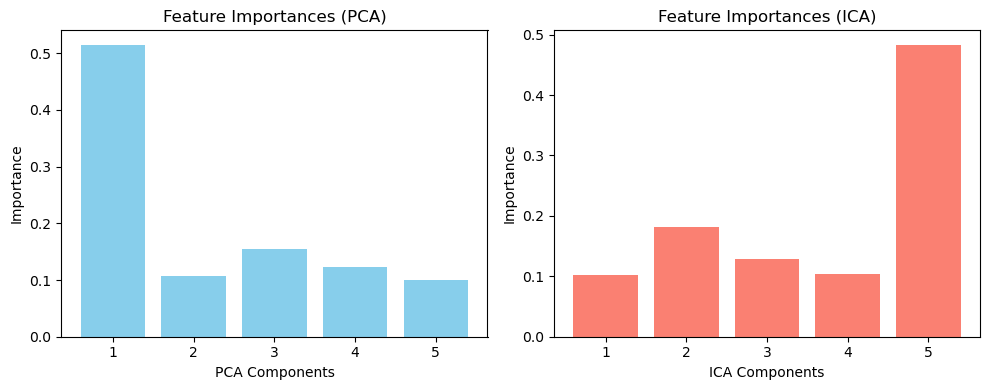

In [ ]:
print("\n🎯 Feature Importances (PCA Features):")
for idx, importance in enumerate(pca_importances):
    print(f"PCA Component {idx+1}: {importance:.4f}")

print("\n🎯 Feature Importances (ICA Features):")
for idx, importance in enumerate(ica_importances):
    print(f"ICA Component {idx+1}: {importance:.4f}")

plt.figure(figsize=(10,4))

plt.subplot(1, 2, 1)
plt.bar(range(1, 6), pca_importances, color='skyblue')
plt.title('Feature Importances (PCA)')
plt.xlabel('PCA Components')
plt.ylabel('Importance')

 
plt.subplot(1, 2, 2)
plt.bar(range(1, 6), ica_importances, color='salmon')
plt.title('Feature Importances (ICA)')
plt.xlabel('ICA Components')
plt.ylabel('Importance')

plt.tight_layout()
plt.show()